In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd 
from tensorflow.keras import layers

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
import os 
import shutil

In [3]:
image_size = (180,180)
batch_size = 32 

training_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    "cancer classifier",
    validation_split = 0.2,
    subset=  "training", 
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)

Found 2750 files belonging to 3 classes.
Using 2200 files for training.


In [4]:
validation_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    "cancer classifier",
    validation_split = 0.2,
    subset=  "validation", 
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)

Found 2750 files belonging to 3 classes.
Using 550 files for validation.


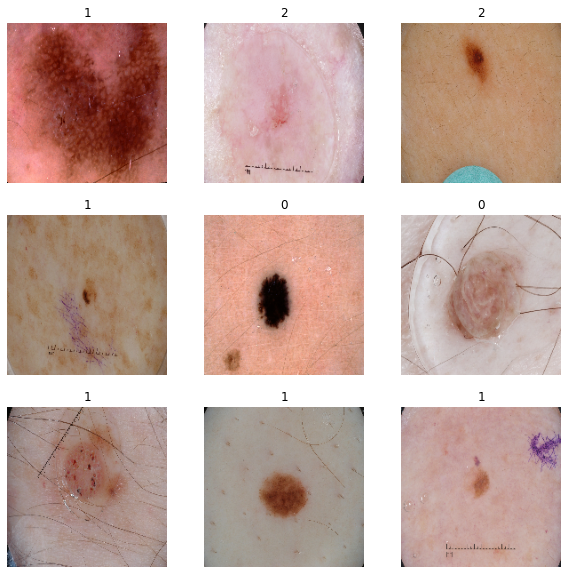

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in training_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
training_dataset = training_dataset.prefetch(buffer_size=32)
validation_dataset = validation_dataset.prefetch(buffer_size=32)

In [7]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)